## Linear Support Vector Classifier (SVC)

***Declaration ***: The central idea and coding  is abstract  from Kevin mark ham youtube video seriese, Introduction to machine learning with scikit-learn video series. You can find link under resources section.  

What are the **features**?
- trip_id: A unique number to identify each trip

- From station Number: From station number where the trip Start    
    
- Day: Day of the trip for example Monday, Tuesday etc.
    
- Month: Which month trip took place
    
- Duration: Total trip duration in minutes
    
- birthyear: Birth year of user
    
- Sex: Gender identification of user
    
- age: Current age of user

What is the **response**?
- Station Number: To Station Number where the trip ends

**Question:** Could we predict the End station of a bicycle trip before journey start?

# Libraries

In [260]:
import os,csv,io,mapsplotlib,time,folium,googlemaps,geopy,zipfile,requests,warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mysql.connector as sql
from sklearn.linear_model import LinearRegression
model = LinearRegression()
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.svm import LinearSVC
import numpy as np
warnings.simplefilter('ignore')

In [261]:
# display plots in the notebook
%matplotlib inline

It is difficult to obtain better accuracy with all end stations (to_station). With all end station the model predicts 0.067 percent of accuracy, to avoid this this study focus on a circumscribed number of end station. From our following query we are supposing here that ‘it does not matter where the bicycle trip will start. We are more interested in where this trip ends and to reach this goal. We havechoosen five main busiest end stations. Let’s say’s if a journey start from A, B and C station what is the chances it will end on the given end stations.

In [286]:
#importing data from database
db_connection = sql.connect(host='localhost', database='bike', user='root', password='none')
db_cursor = db_connection.cursor()
db_cursor.execute('SELECT trip_id,tripduration_minutes Duration,from_station_name,from_station_id_num,to_station_id,to_station_name,to_station_id_num,Day_num Day,bmonth Month,year Year,age,Sex_num Sex,sthours Hours FROM bike.trip_clean where to_station_id_num in(7,9,36,37,38) order by to_station_id_num;')
table_rows = db_cursor.fetchall()
data = pd.read_sql('SELECT trip_id,tripduration_minutes Duration,from_station_name,from_station_id_num,to_station_id,to_station_name,to_station_id_num,Day_num Day,bmonth Month,year Year,age,Sex_num Sex,sthours Hours FROM bike.trip_clean where to_station_id_num in(7,9,36,37,38) order by to_station_id_num;', con=db_connection)
df = pd.DataFrame(data)
df.tail()

,trip_id,Duration,from_station_name,from_station_id_num,to_station_id,to_station_name,to_station_id_num,Day,Month,Year,age,Sex,Hours
25845,254994,8.23,Dexter Ave N & Aloha St,34,SLU-15,6th Ave,38,6,8,2016,30,1,8
25846,254998,9.15,E Thomas St,14,SLU-15,6th Ave,38,6,8,2016,42,1,8
25847,255058,7.89,E Pine St,16,SLU-15,6th Ave,38,6,8,2016,31,1,11
25848,255087,8.03,E Pine St,16,SLU-15,6th Ave,38,6,8,2016,46,1,13
25849,255149,5.97,Elliott Ave,1,SLU-15,6th Ave,38,6,8,2016,49,1,17


In [287]:
# define X and y
feature_cols = ['Duration','from_station_id_num','Hours','age','Sex']
X = df[feature_cols]
y = df.to_station_id_num

In [288]:
clf = LinearSVC(loss = 'l2') # instantiated with L2 loss
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


In [289]:
clf = clf.fit(X, y)

creating an instance of the classifier.  This can be done simply by calling the class name, with any arguments that the object accepts:

In [290]:
clf = LinearSVC(loss = 'l2')

``clf`` is a statistical model that has parameters that control the learning algorithm (those parameters are sometimes called the *hyperparameters*). Those hyperparameters can be supplied by the user in the constructor of the model. We will discuss later how to choose a good combination using either simple empirical rules or data driven selection:

In [291]:
print (clf)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


By default the model parameters are not initialized. They will be tuned automatically from the data by calling the ``fit`` method with the data ``X`` and labels ``y``:

In [292]:
clf = clf.fit(X, y)

We can now see some of the fit parameters within the classifier object.

**In scikit-learn, parameters defined by training have a trailing underscore.**

In [293]:
clf.coef_

array([[ 0.00950903, -0.01109086, -0.03497464,  0.00547468,  0.14144825],
       [ 0.02200425, -0.00867309, -0.0049677 , -0.00078617, -0.037603  ],
       [ 0.00770462, -0.01191933, -0.03452227, -0.01234906, -0.20865379],
       [-0.01293034, -0.0135128 , -0.01560987,  0.01064128,  0.20328287],
       [-0.01407   , -0.00418773, -0.00857613,  0.02144292, -0.05450888]])

In [294]:
clf.intercept_

array([-0.62125724, -0.68454511,  0.35656843, -0.80650014, -1.15293788])

Once the model is trained, it can be used to predict the most likely outcome on unseen data.

In [297]:
#here is the from station number. What end station does this get predicted as?
X_new = [[22, 31, 35, 7, 9]] 
clf.predict(X_new) #end station number 37

array([37], dtype=int64)

All classification tasks involve predicting an unknown category based on observed features.

# Probabilistic Prediction

In [298]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X, y)
print (clf2.predict_proba(X_new))

[[ 0.26817904  0.11485692  0.0005781   0.56730664  0.0490793 ]]


In [300]:
clf2.predict(X_new) #end station number 37

array([37], dtype=int64)

The result gives the probability (between zero and one) that the test point comes from any of the three classes.

This means that the model estimates that the sample in X_new has:

- 90% likelyhood to belong to the ‘to station’ class (``end station = 37``)
- 9% likelyhood to belong to the ‘to station’ class (``end station = 36``)
- < 1% likelyhood to belong to the ‘to station’ class (``end station = 38``)

# Evaluating the Model

Let's get a rough evaluation our model by using
it to predict the values of the training data:

In [301]:
y_model = clf2.predict(X)

In [302]:
print (y_model == y)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8         True
9        False
10       False
11       False
12       False
13       False
14       False
15        True
16       False
17        True
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
25820    False
25821    False
25822    False
25823    False
25824    False
25825    False
25826    False
25827    False
25828    False
25829    False
25830    False
25831    False
25832    False
25833    False
25834    False
25835    False
25836    False
25837    False
25838    False
25839    False
25840     True
25841     True
25842    False
25843    False
25844    False
25845    False
25846    False
25847    False
25848     True
25849    False
Name: to_station_id_num, dtype: bool


We see that most of the predictions are incorrect!

# Measuring Classification Performance: Validation & Testing

### Cross-Validation

Learning the parameters of a prediction function and testing it on the
same data is a methodological mistake: a model that would just repeat
the labels of the samples that it has just seen would have a perfect
score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

- a training set X_train, y_train which is used for learning the parameters of a predictive model
- a testing set X_test, y_test which is used for evaluating the fitted predictive model

In scikit-learn such a random split can be quickly computed with the
`train_test_split` helper function.  It can be used this way:

In [306]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25, random_state=0) # 25% of test data

print (X.shape, X_train.shape, X_test.shape) #  Training data => (6463, 5)

(25850, 5) (19387, 5) (6463, 5)


Now we train on the training data, and test on the testing data:

In [307]:
clf = LinearSVC(loss='l2').fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (y_pred == y_test)

15014    False
15095     True
8653      True
15333    False
22750    False
10281    False
10227    False
3861     False
19032    False
6662     False
10139     True
1799      True
21841    False
4043     False
4725      True
24434    False
21407    False
21838    False
13339    False
20510    False
4285     False
12461    False
19098    False
5619     False
379      False
21396    False
5192     False
3822     False
15548    False
25161    False
         ...  
25166    False
5274      True
20725    False
11758    False
25186    False
14466    False
24563    False
13321    False
20033    False
20672    False
1143      True
23027    False
6331      True
25178    False
16581    False
19207    False
15234    False
13045    False
6644      True
16760    False
23173    False
7597      True
16136     True
17487    False
878       True
467      False
7016     False
5536     False
15761    False
5583     False
Name: to_station_id_num, dtype: bool


There is an issue here, however:
by defining these two sets, we drastically reduce the number
of samples which can be used for learning the model, and the results
can depend on a particular random choice for the pair of (train, test) sets.

A solution is to split the whole data several consecutive times in different
train set and test set, and to return the averaged value of the prediction
scores obtained with the different sets. Such a procedure is called **cross-validation**.
This approach can be computationally expensive, but does not waste too much data
(as it is the case when fixing an arbitrary test set), which is a major advantage
in problem such as inverse inference where the number of samples is very small.

We'll explore cross-validation , but
for more information on cross-validation in scikit-learn here:
http://scikit-learn.org/dev/modules/cross_validation.html


# Cross-validation for parameter tuning, model selection, and feature selection

In [308]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ((metrics.accuracy_score(y_test, y_pred))*100)

72.1646294291


we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together and That's the essense of **cross-validation!**

## Method Of K-cross Validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

### Parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN

In [315]:
from sklearn.cross_validation import cross_val_score

In [316]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[ 0.76352396  0.76334107  0.76836814  0.65390565  0.68201161  0.70085139
  0.68846749  0.70123839  0.68537152  0.59349593]


In [317]:
# use average accuracy as an estimate of out-of-sample accuracy
print ((scores.mean())*100)

70.0057513886


In [318]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.77018611022881145, 0.71980910690268751, 0.70778630842517321, 0.70191100103433901, 0.70005751388561444, 0.69456571797540645, 0.68775720442010313, 0.68625010043589507, 0.68338717619918021, 0.67882406712522447, 0.67503423561828779, 0.67031535609937565, 0.66540247068146352, 0.66145728601652398, 0.65801557129775445, 0.65600341199435996, 0.65279269844244692, 0.65112880600595235, 0.65074210827620882, 0.64799576192400632, 0.6468742639994598, 0.64521028196917174, 0.64385661520741366, 0.641302869332942, 0.63863440041152075, 0.63697047844981969, 0.6358491001533868, 0.63352840515897724, 0.63105301602567088, 0.62938949864783933]


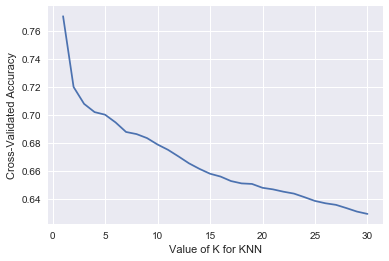

In [319]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

The following graphs display the lower value of k is better for our model accuracy and with K=1 we will get max of 76 percent of accuracy which is ok.

-----------------------------------------

### Model selection

**Goal:** Compare the best KNN model with logistic regression

In [322]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=2)
print ((cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())*100)

71.9809106903


In [323]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print ((cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())*100)

26.9206953717


From the above result we are selecting KNN Neighbours with K=1 which is produce a better mean accuracy which is 72 percent aproximately. As compare to logistic regression. The logistic regression offer mean accuracy of 26.92 which is approximately 27 percent that is very low. So, because of that result, this study will use KNN Neighbours with k=1 for our predictions.

----------------------------------------

## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

----------------------------------------

## Resources
References:*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*
- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)

----------------------------------------